In [1]:
"""
jupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py

"""

'\njupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py\n\n'

In [2]:
from __future__ import division
import os
import glob
import pickle
from natsort import natsorted
import argparse
import os
import sys
import numpy as np
import tqdm
import pandas as pd

import scipy as sp
import numpy as np
from pprint import pprint
import glob
import sys
sys.path.append('../')
from plume_env import PlumeEnvironment, PlumeFrameStackEnvironment
import config
import agents
import agent_analysis
import os
import sklearn
import sklearn.decomposition as skld


import sim_analysis

import importlib
import log_analysis
importlib.reload(log_analysis)

import config
np.random.seed(config.seed_global)

In [3]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse

Interactive mode


In [4]:
# Common
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches



from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(style="white")
# print(plt.style.available)

mpl.rcParams['figure.dpi'] = 100
dpi_save = 300
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

# Interactive vs. CLI
if not batchmode:
    %matplotlib inline
    # %config InlineBackend.figure_format = 'svg'
    %config InlineBackend.figure_format = 'retina'
if batchmode:
    matplotlib.use("Agg")
    
pca3d_figsize=(10,5)

In [5]:
# Common
# outcome_colormap = {'HOME': 'green', 
#                     'OOB':'red', 
#                     'OOT':'blue'
#                    }

# outcome_colormap = {'HOME': 'skyblue', 
#                     'OOB':'orange', 
#                     'OOT':'blue'
#                    }

# regime_colormap = {'SEARCH': 'red', 
#                    'TRACK':'green', 
#                    'RECOVER':'blue', 
#                    'WARMUP':'cyan'
#                   }

importlib.reload(config)
outcome_colormap = config.outcome_colormap
regime_colormap = config.regime_colormap



# https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes
sns.color_palette()
sns.set_color_codes(palette='deep')

In [6]:
if batchmode:
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--expt_dir', 
                default='/home/satsingh/plume/plumezoo/latest/fly/memory/')
    args = parser.parse_args()
    print(args)
    
    expt_dir = args.expt_dir
else:
    expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/memory/'

outdir = f'{expt_dir}/report_common_subspace/'
os.makedirs(outdir, exist_ok=True)

In [7]:
models = natsorted(glob.glob(f'{expt_dir}/*VRNN*.pt'))
assert len(models) > 0

In [8]:
use_datasets = ['constantx5b5', 'switch45x5b5', 'noisy3x5b5', 
#                 'constantx5b5_0.2', 
                'constantx5b5_0.4', 
#                 'constantx5b5_0.6', 
               ]
selected_df_all = []

for model_fname in models:
    model_dir = model_fname.replace('.pt', '/')
    print("model_dir", model_dir)
    model_seed = model_dir.split('seed')[-1].split('/')[0]

#     outdir = f"{model_dir}/report_common_subspace/"
#     os.makedirs(outdir, exist_ok=True)
#     print(outdir)

#     is_recurrent = True if ('GRU' in model_dir) or ('VRNN' in model_dir) else False

#     logfiles = natsorted(glob.glob(model_dir + '*.pkl'))
#     [ x.split('/')[-1] for x in logfiles ]

    selected_df = log_analysis.get_selected_df(model_dir, 
                                  use_datasets, 
                                  n_episodes_home=60, 
                                  n_episodes_other=60,
                                  min_ep_steps=0)
    selected_df['model_seed'] = model_seed
    print(model_seed, selected_df.shape)
    selected_df_all.append( selected_df )



model_dir /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9/
3307e9 (386, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed9781ba/
9781ba (436, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed541058/
541058 (404, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed2760377/
2760377 (480, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.0

In [9]:
selected_df_all = pd.concat(selected_df_all)
selected_df_all.shape

(2172, 6)

In [10]:
selected_df_all.groupby(['model_seed', 'dataset', 'outcome']).count()

idx  ep_length  log
model_seed dataset          outcome                     
2760377    constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      60         60   60
                            OOB       60         60   60
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60
3199993    constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      60         60   60
                            OOB       60         60   60
           switch45x5b5     HOME      53         53   53
                            OOB       53         53   53
3307e9     constantx5b5     HOME      33         33   33
                            OOB       33         33   33
           constantx5b5_0.4 HOME      44         44   44
                            OOB       44         44   44
           noisy3x5b5       HOME      56         56   56
                            OOB       56         56   56
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60
541058     constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      22         22   22
                            OOB       22         22   22
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60
9781ba     constantx5b5     HOME      59         59   59
                            OOB       59         59   59
           constantx5b5_0.4 HOME      39         39   39
                            OOB       39         39   39
           noisy3x5b5       HOME      60         60   60
                            OOB       60         60   60
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60

## Figure 1

In [16]:
# # Find a few good examples
# importlib.reload(agent_analysis)
# import sim_analysis
# importlib.reload(sim_analysis)
# dataset = 'switch45x5b5'
# dataset = 'noisy3x5b5'
# dataset = 'constantx5b5'
# birthx = 1.0
# # birthx = 0.4

# task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
# # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == '3307e9'").sample(5)
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# agent_analysis.visualize_episodes(logs, 
#                                   zoom=1, 
#                                   dataset=dataset,
#                                   episode_idxs=idxs,
#                                   animate=False,
#                                   plotsize=(8,8), 
#                                   birthx=birthx,
#                                  )

ep_selected = []
ep_selected.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                    'idx':196, 'birthx':1.0, 'zoom':1})
ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':153, 'birthx':0.4, 'zoom':1})
ep_selected.append({'dataset':'noisy3x5b5', 'model_seed':'541058', 
                    'idx':112, 'birthx':1.0, 'zoom':2})
ep_selected.append({'dataset':'switch45x5b5', 'model_seed':'9781ba', 
                    'idx':219, 'birthx':1.0, 'zoom':2})
ep_selected = pd.DataFrame(ep_selected)

# # , 9781ba, 219
# # noisy3x5b5, 541058, 112
# # constantx5b5_0.4, 3307e9, 153 or 112
# subset
ep_selected

,dataset,model_seed,idx,birthx,zoom
0,constantx5b5,9781ba,196,1.0,1
1,constantx5b5,3307e9,153,0.4,1
2,noisy3x5b5,541058,112,1.0,2
3,switch45x5b5,9781ba,219,1.0,2


constantx5b5
/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_constantx5b5_1.0.png


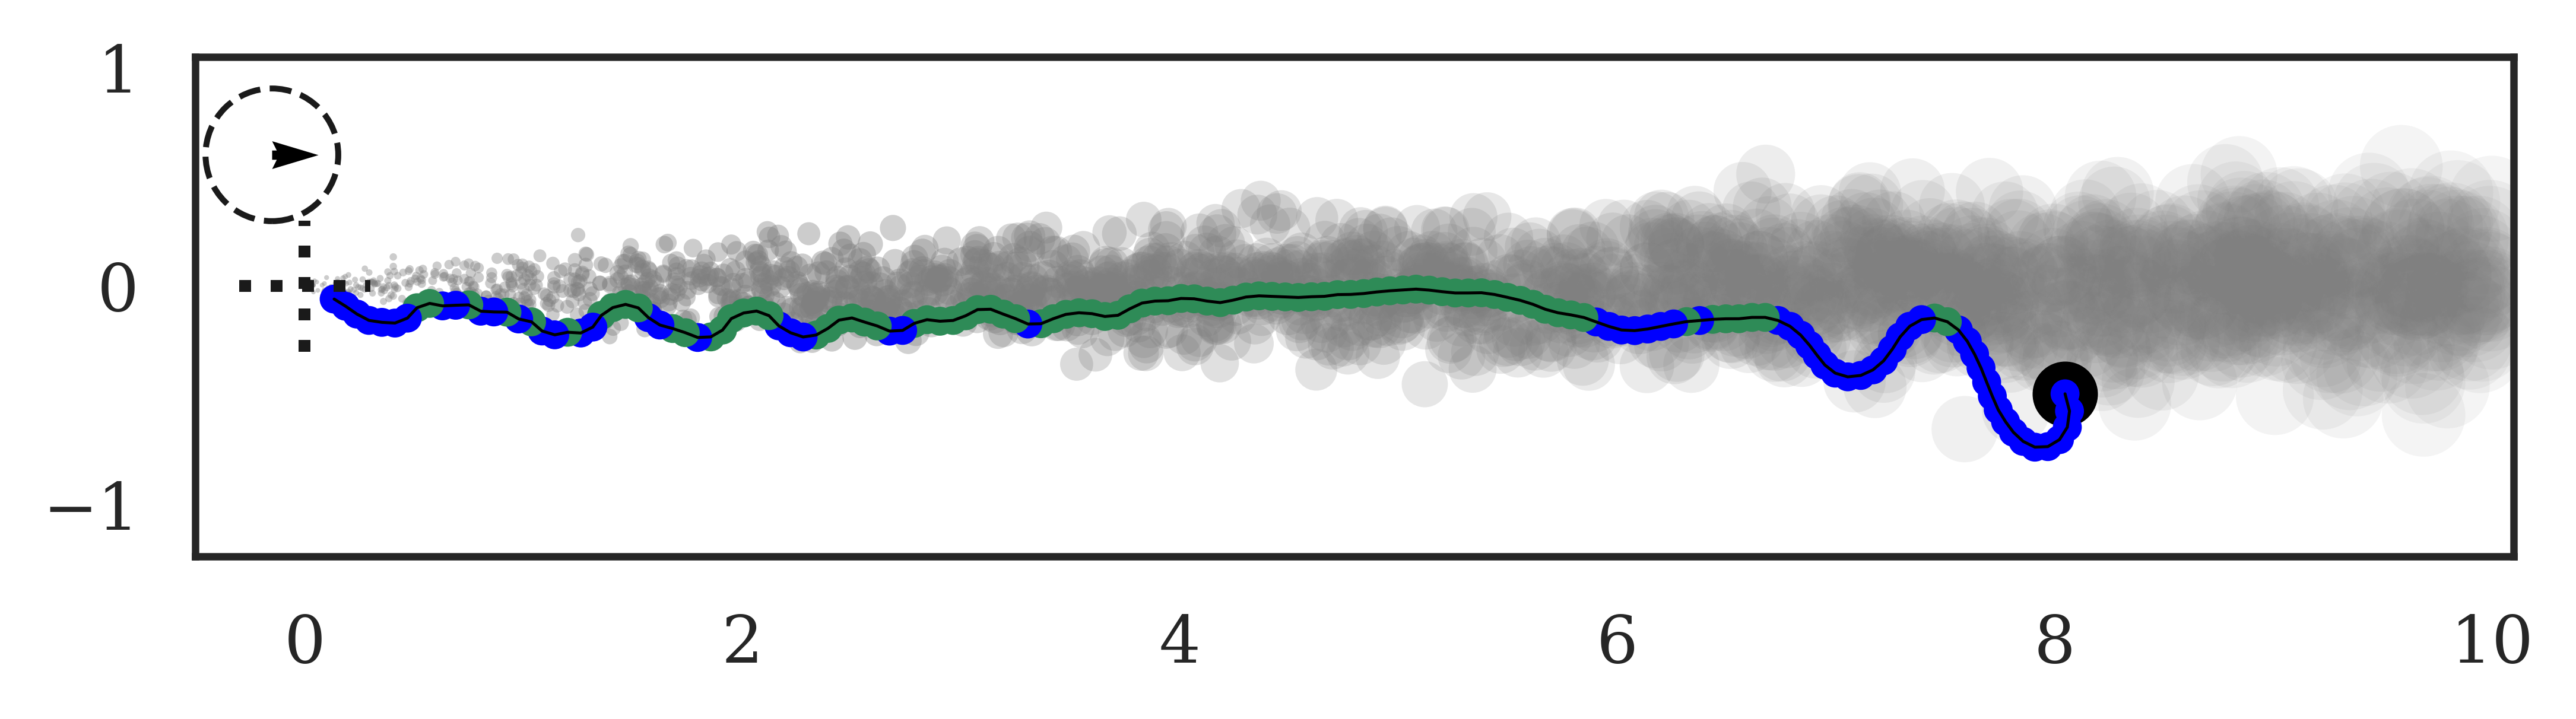

constantx5b5
Sparsifying puffs to 0.4x
/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_constantx5b5_0.4.png


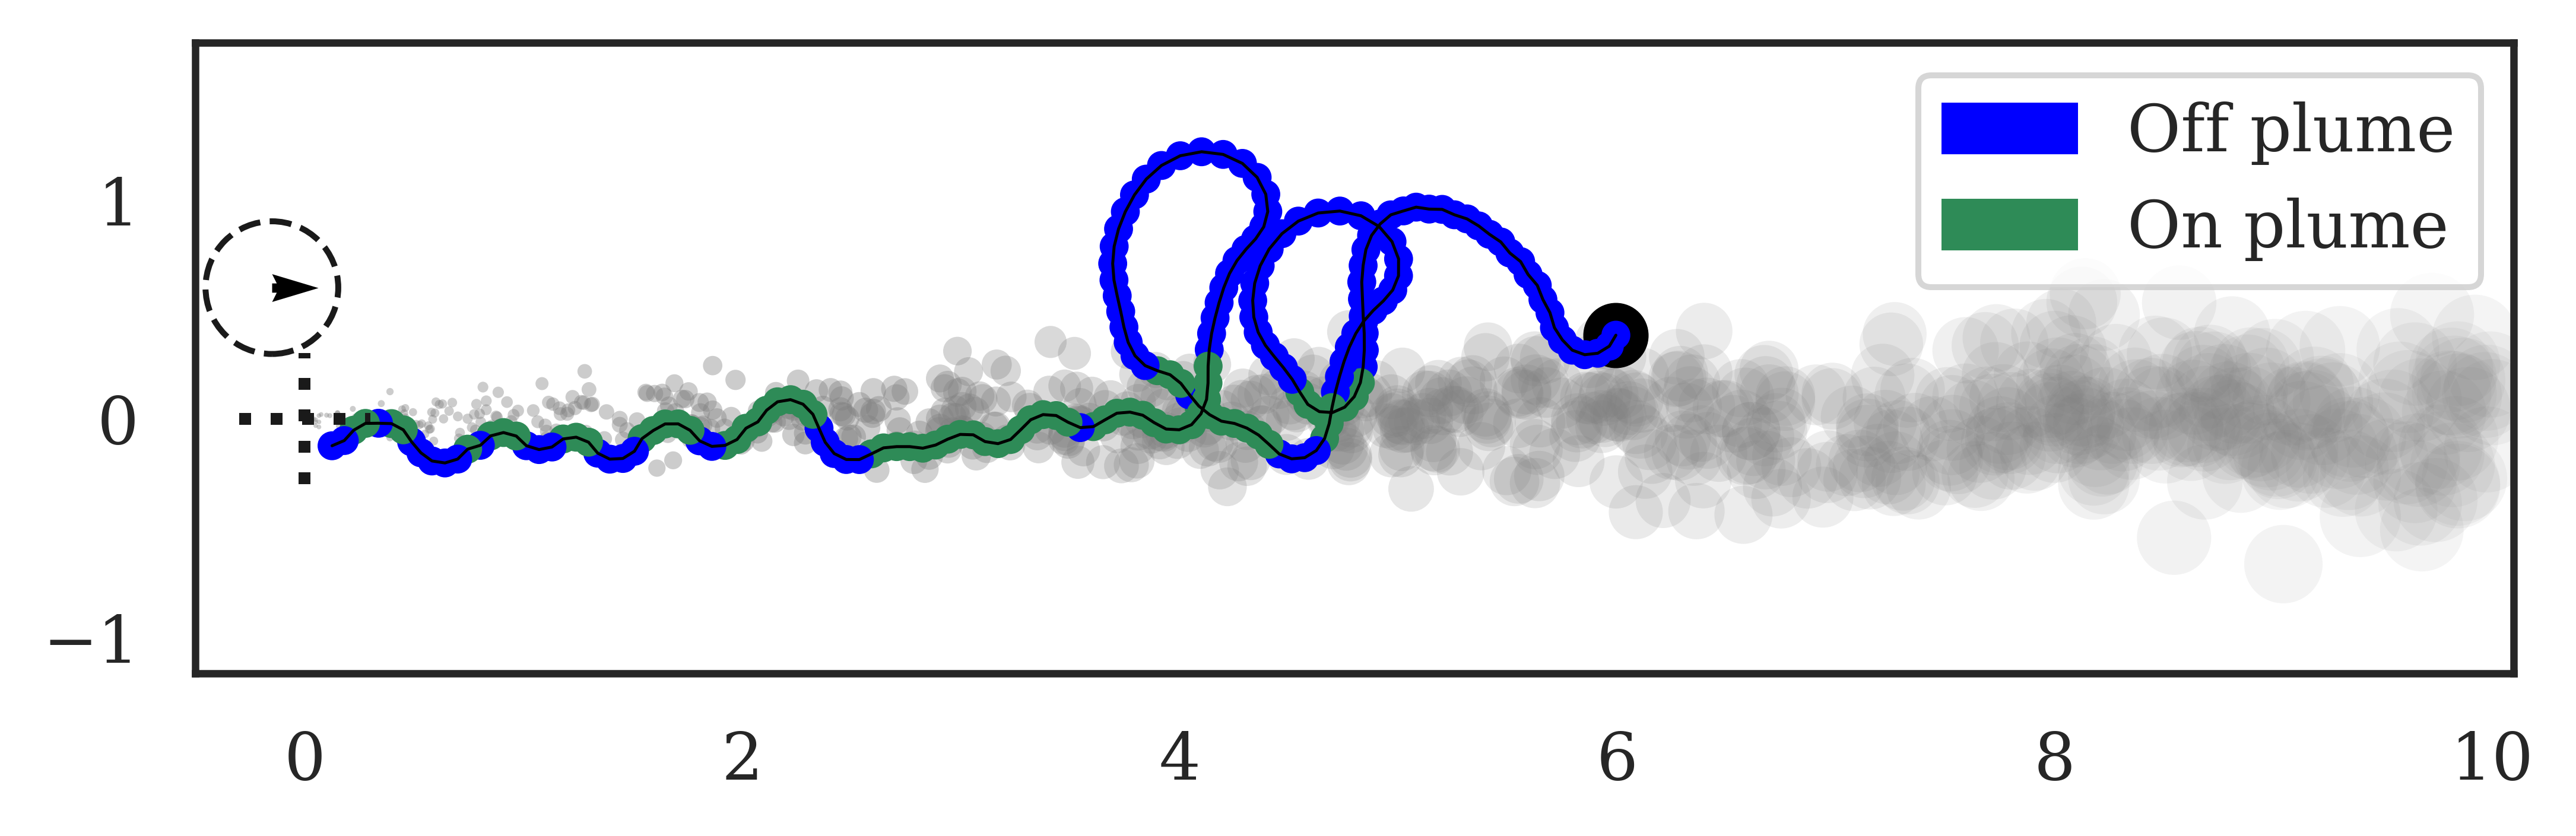

noisy3x5b5
/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_noisy3x5b5_1.0.png


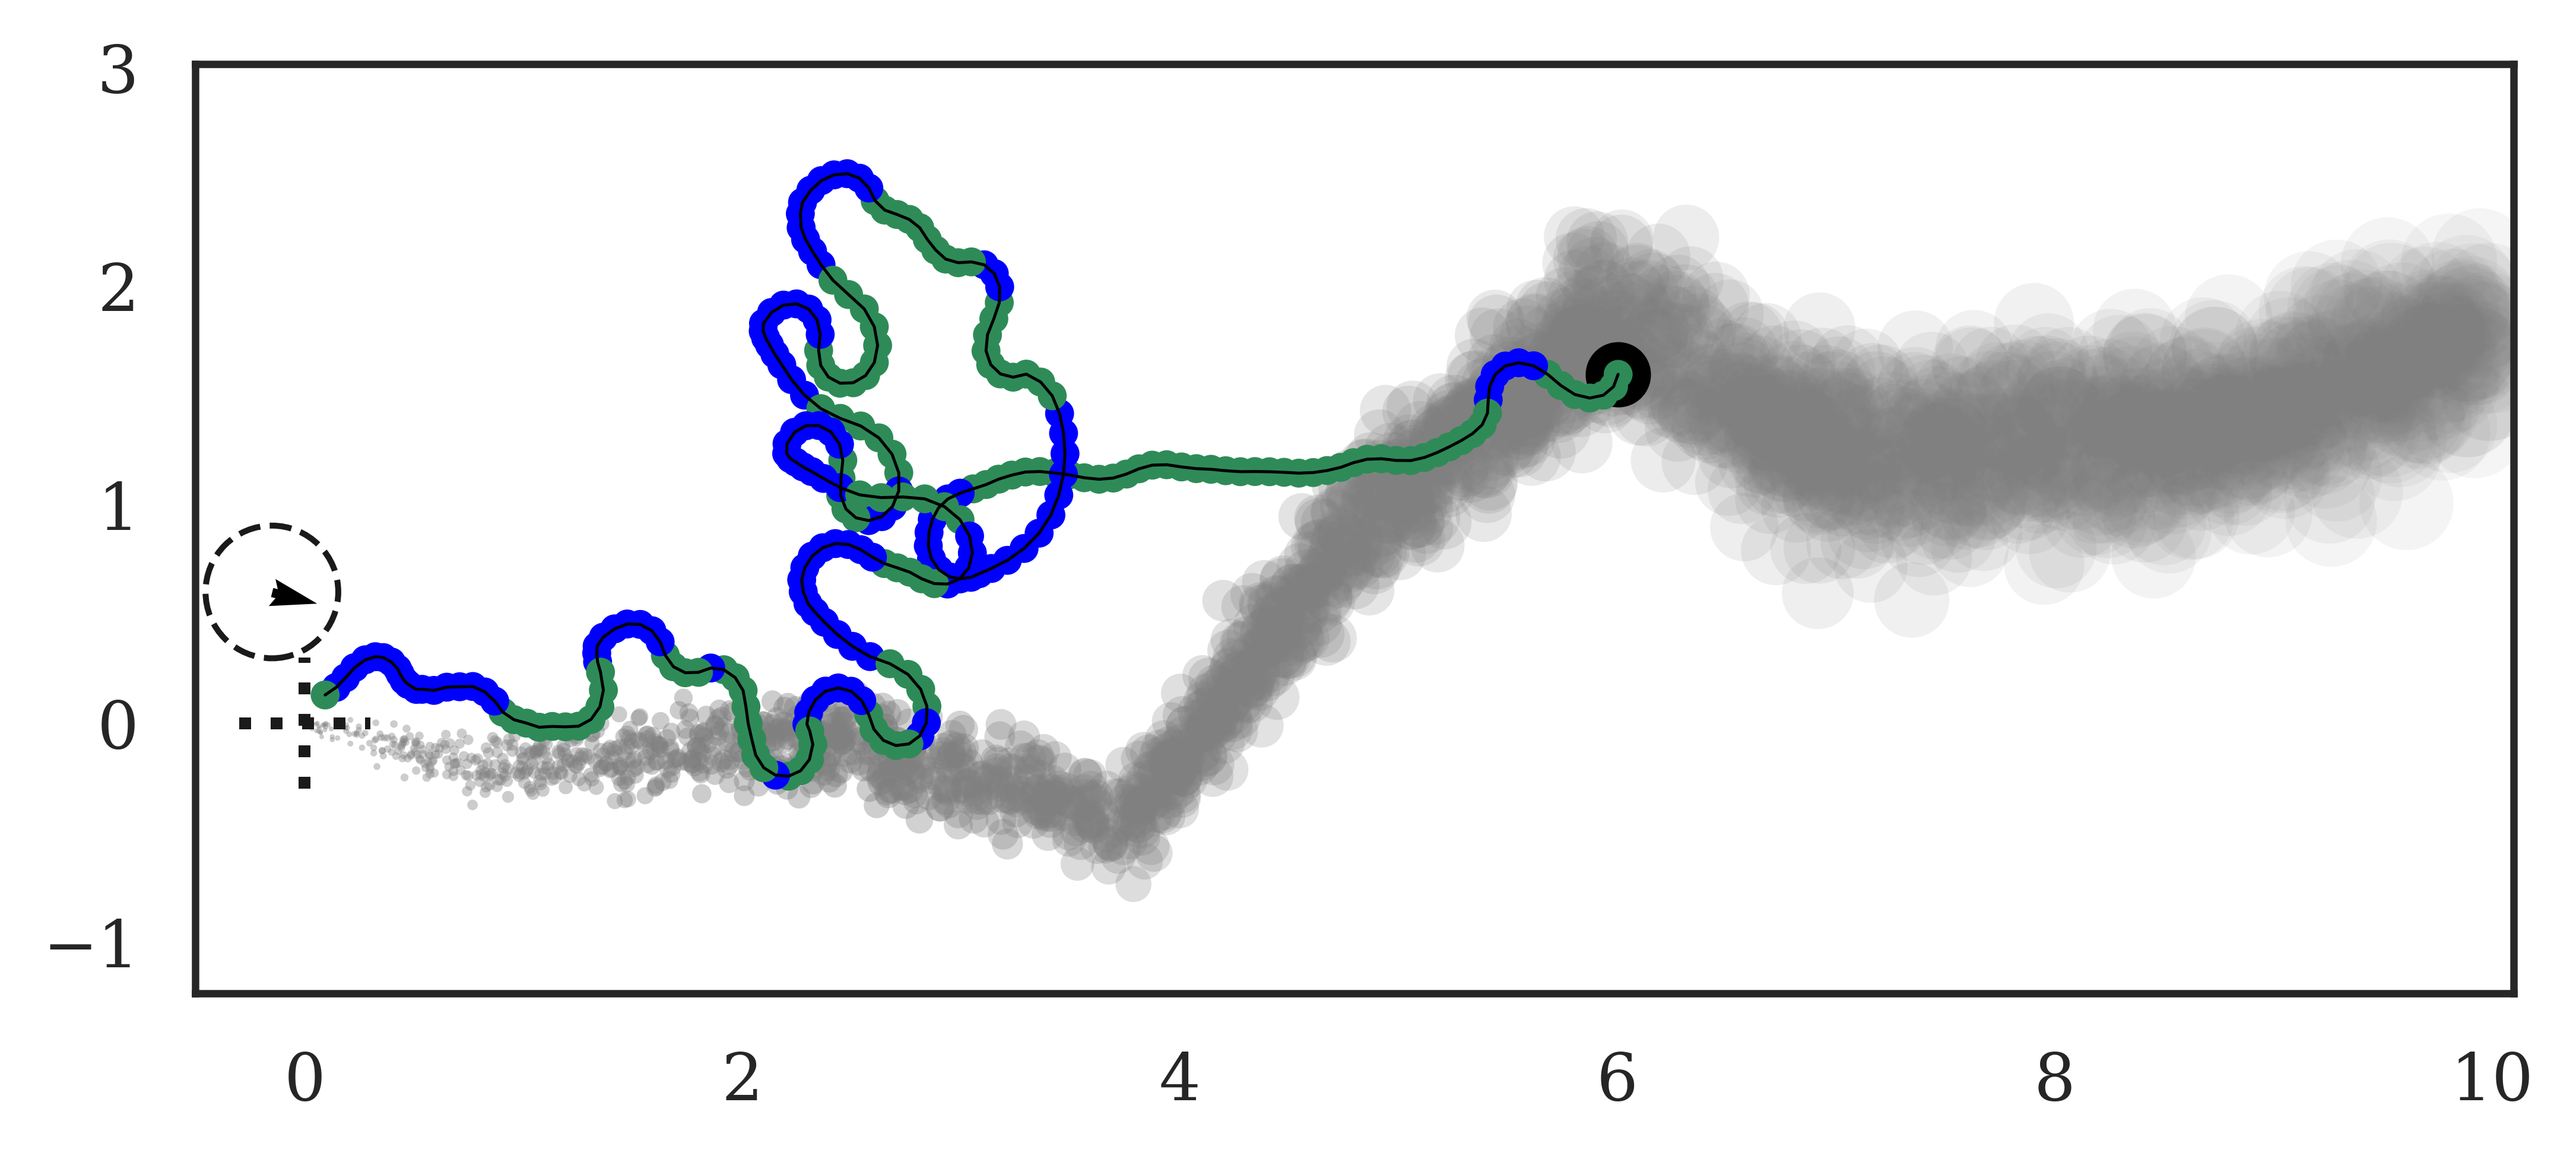

switch45x5b5
/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_switch45x5b5_1.0.png


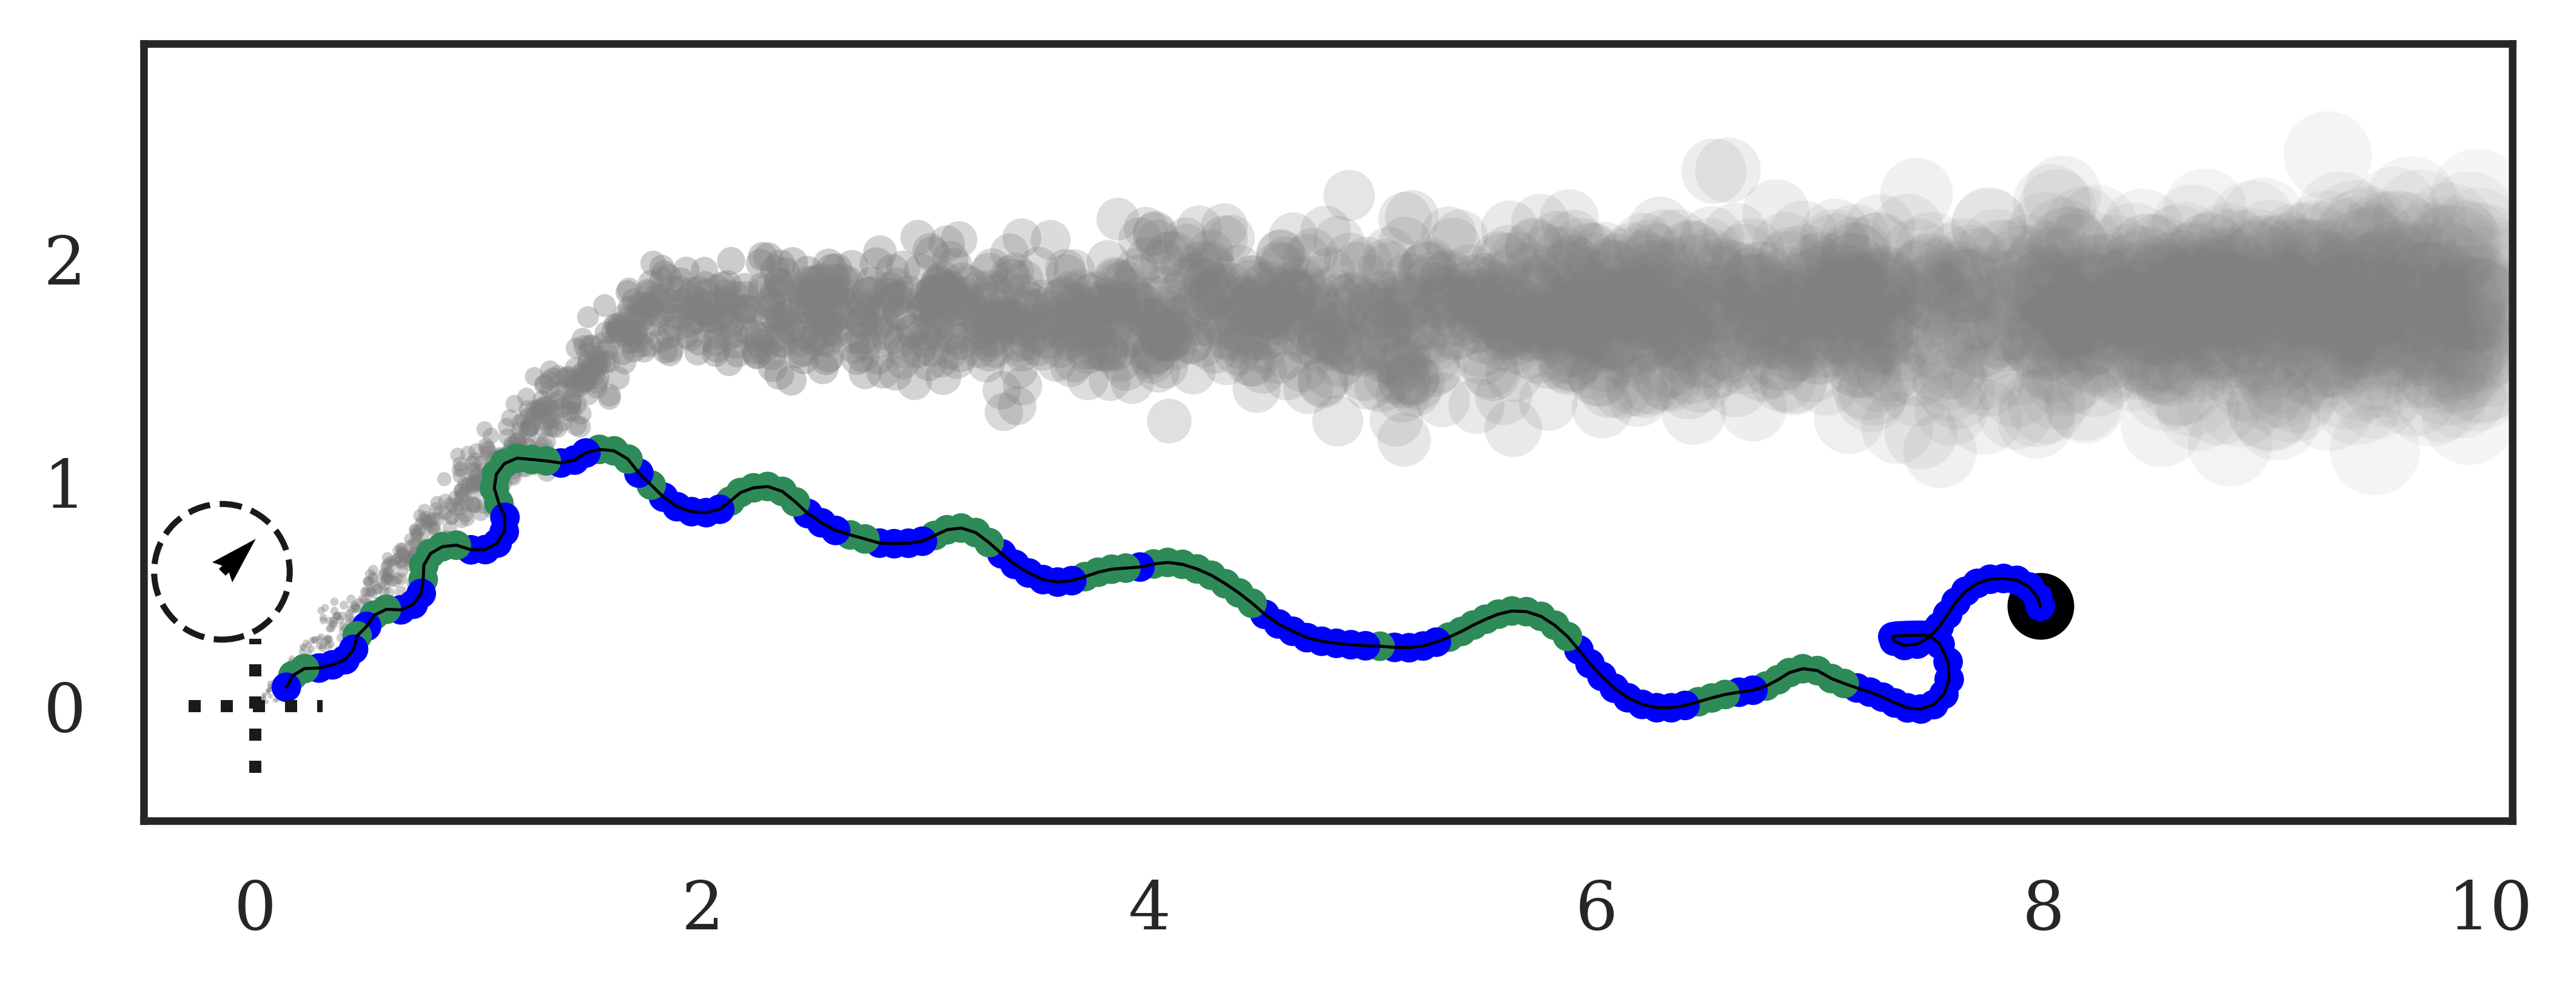

In [20]:
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(config)
importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)

forCosyne = False
fnames = []

for idx, row in ep_selected.iterrows():
#     print(row)
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
#     print(task)

    subset = selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1

    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=birthx,
                                     )
    
    if 'noisy3' in dataset and forCosyne: # for cosyne abstract
        centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
        centerline_df = pd.read_pickle(centerline_filename)
        
        t_val = [record[0]['t_val'] for record in logs[0]['infos']][-1]
        tidx = int(t_val*100)
        centerline_t = centerline_df[ centerline_df.tidx == tidx ]
        plt.plot(centerline_t['x'], centerline_t['y'], lw=2, alpha=1.0, c='r', label='Centerline')
        plt.legend()

    if birthx < 1.0:
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
        patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
        handles.extend([patch1, patch2])
        plt.legend(handles=handles)
        
    fname = f"{outdir}/qual_{dataset}_{birthx}.png"
    print(fname)
    fnames.append(fname)
    plt.savefig(fname, dpi=dpi_save)
    plt.show()

['/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_constantx5b5_1.0.png', '/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_constantx5b5_0.4.png', '/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_noisy3x5b5_1.0.png', '/home/satsingh/plume/plumezoo/latest/fly/memory//report_common_subspace//qual_switch45x5b5_1.0.png']


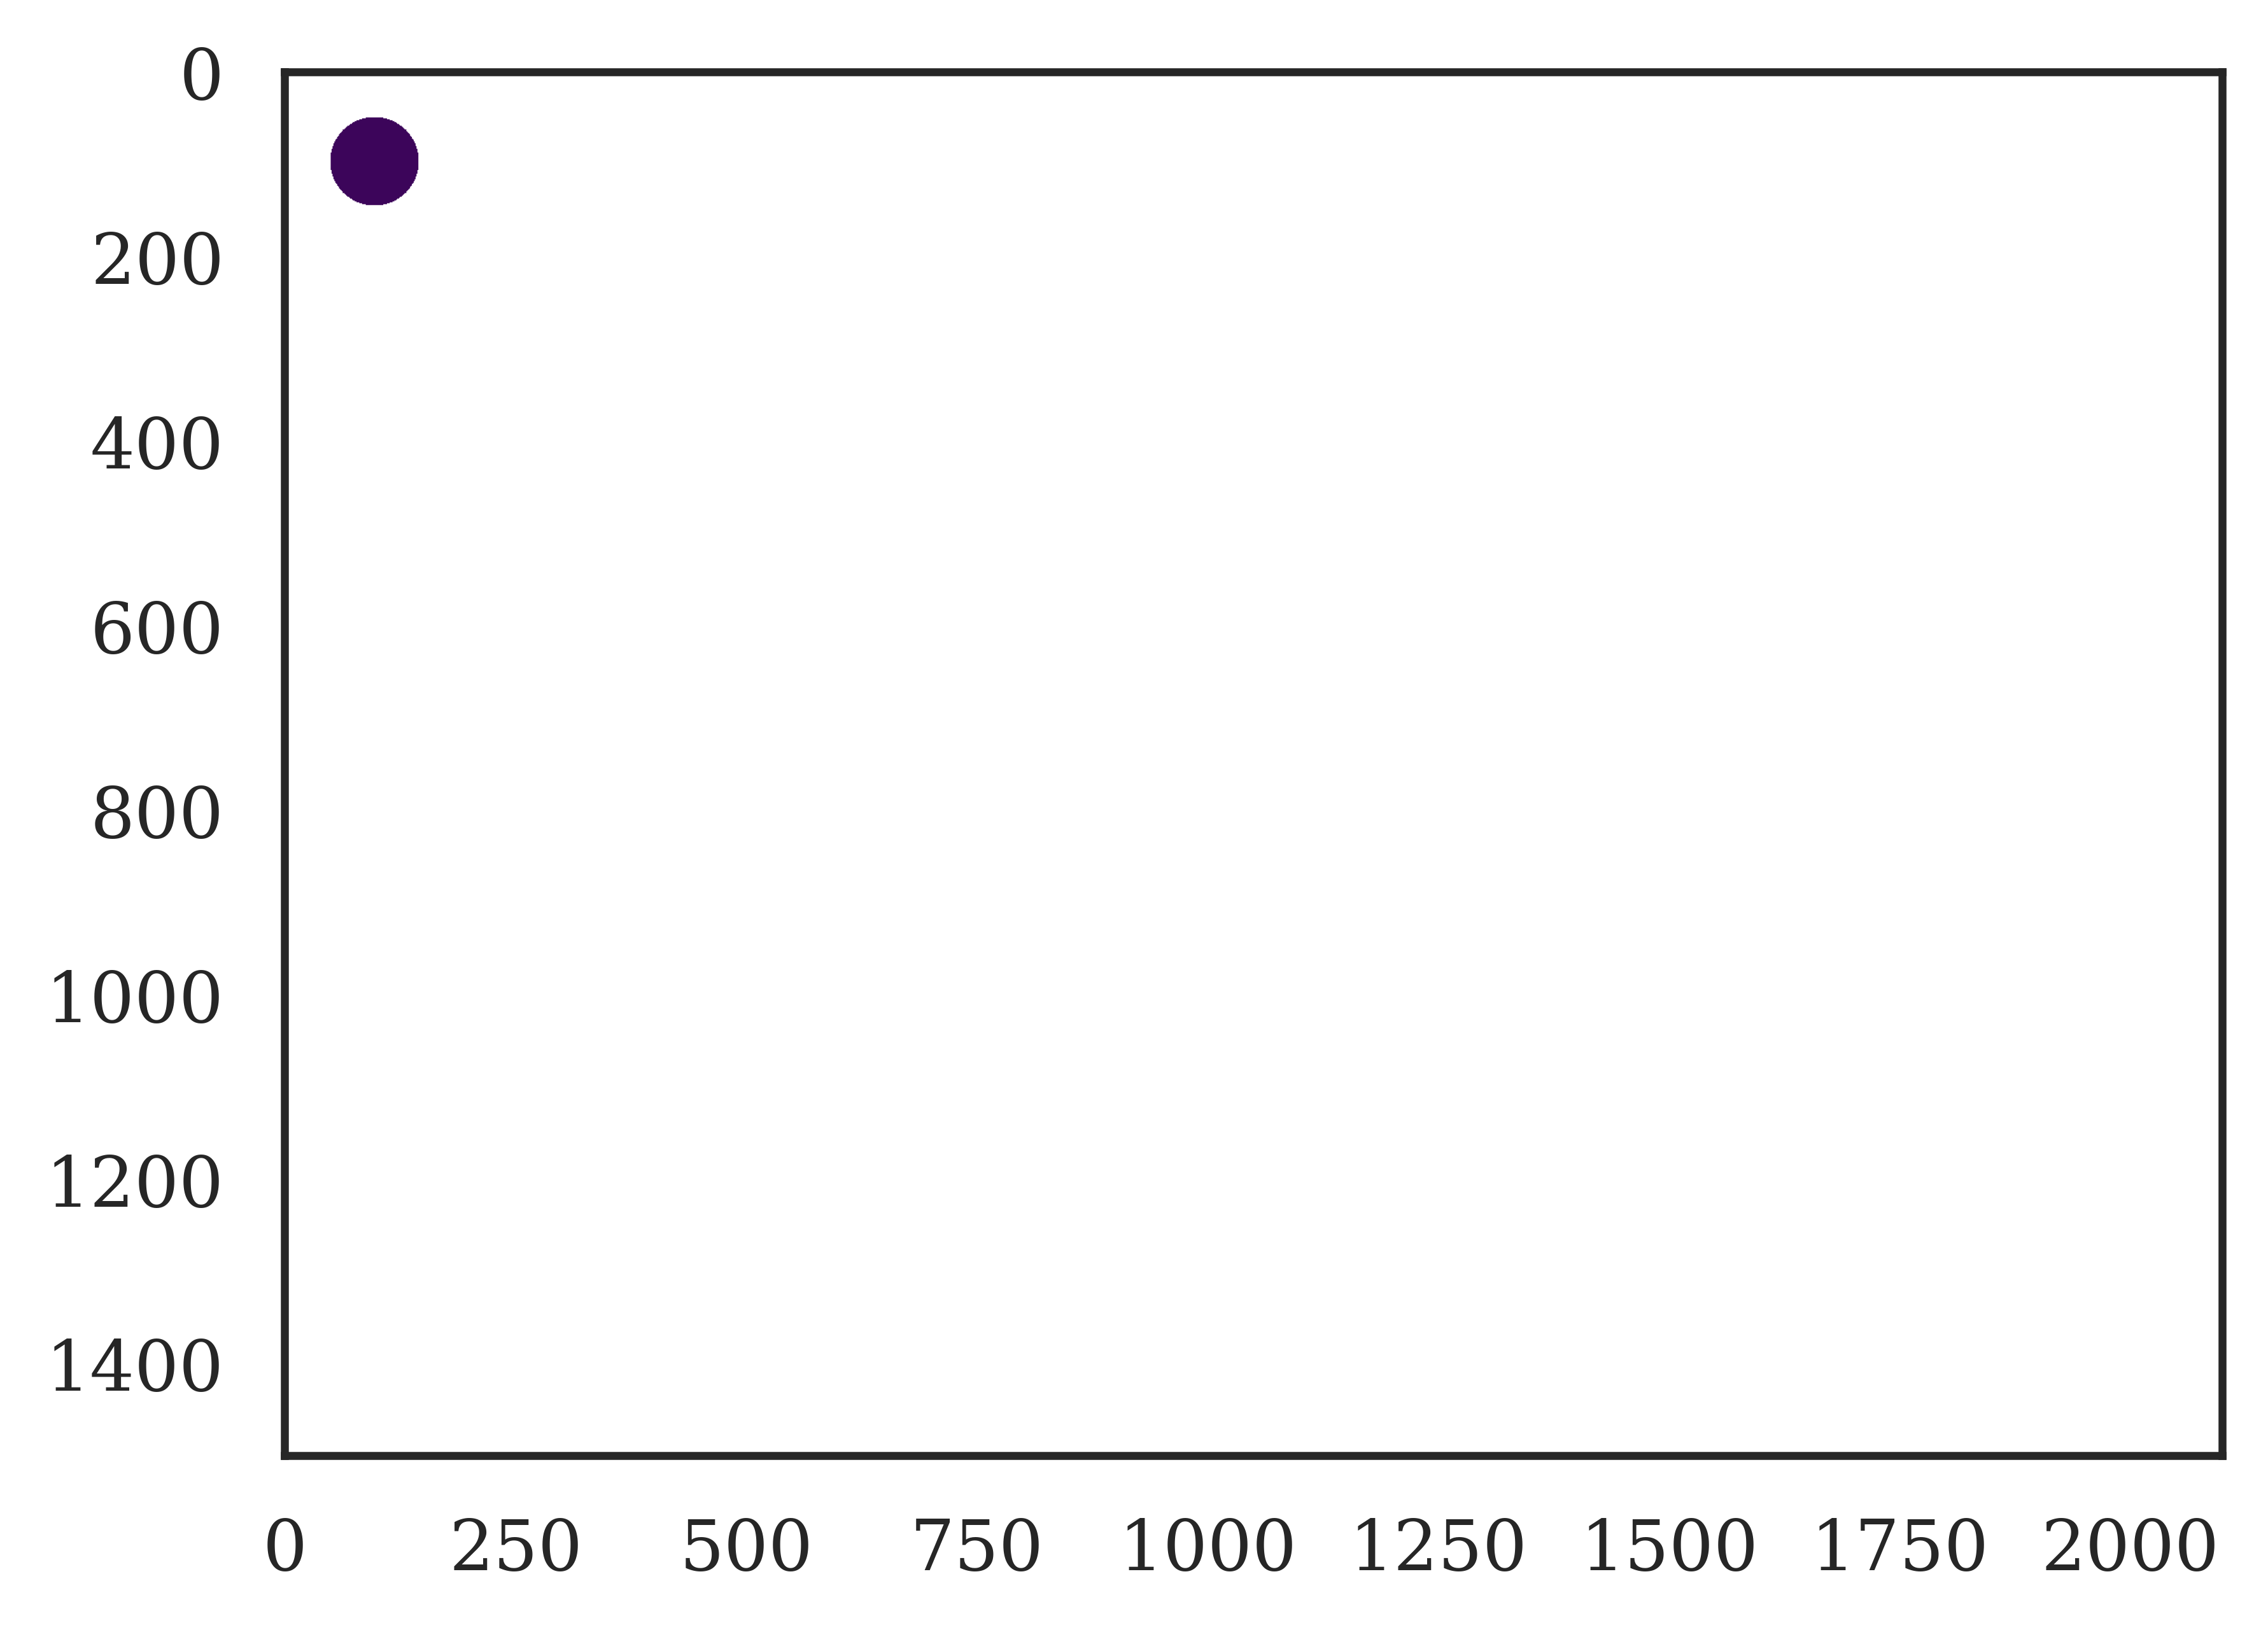

In [30]:
# https://gist.github.com/philmikejones/c2465a992b678e7fde464caed60dd569

import os
import glob
from PIL import Image, ImageDraw, ImageFont

print(fnames)

dpi = 300
width  = int(7 * dpi)
height = int(5 * dpi)

canvas = Image.new("RGBA", (width, height), color = (255, 255, 255))


inset = Image.open(fnames[1])
inset.show()

pastex = 0
pastey = int(height / 2)
canvas.paste(inset, box = (pastex, pastey))
# canvas.paste(Image.eval(fnames[0]), box = (pastex, pastey))


draw = ImageDraw.Draw(canvas)
draw.ellipse( (50,50,145,145), fill=(60,5,90) )

plt.imshow(canvas)
fname = f"{outdir}/qual_canvas.png"
# canvas.save(fname)
canvas.show()

In [36]:
# inset.shape
inset.show()
# display(inset)
np.asarray(inset).shape

(2100, 2100, 4)